___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

# Ingest the data to notebook

In [2]:
df0 = pd.read_csv("heart.csv")
df = df0.copy()

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(303, 14)

In [6]:
df.shape

(303, 14)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# EDA

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

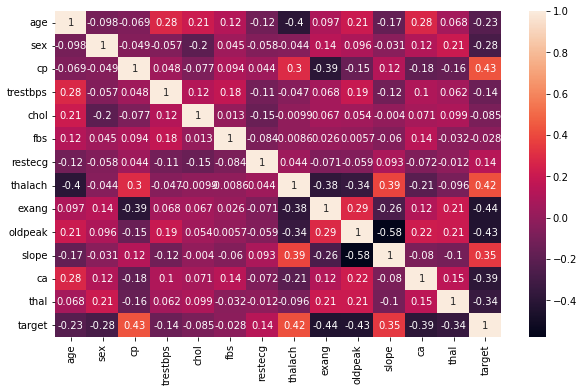

In [11]:
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df.corr(), annot=True);

In [12]:
df.target.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

# Data Preprocessing

In [13]:
X = df.drop("target", axis=1)
y = df["target"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
y_test_pred=log_model.predict(X_test_scaled)

In [23]:
y_test_pred_proba = log_model.predict_proba(X_test_scaled)

In [24]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_test_pred
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,1,0.627760
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0,0,0.029102
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1,0,0.432844
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0,0,0.307033
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0,0,0.094658
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1,1,0.751312
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,1,0.916141
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,0,0.156560
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,1,0.964150
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1,1,0.818172


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [26]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



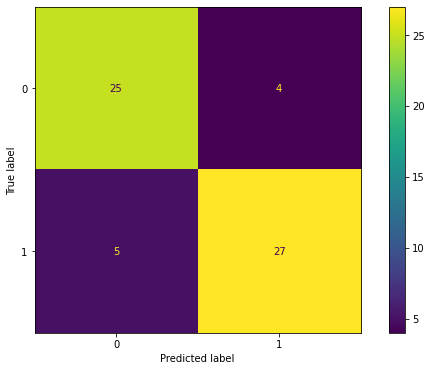

In [27]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

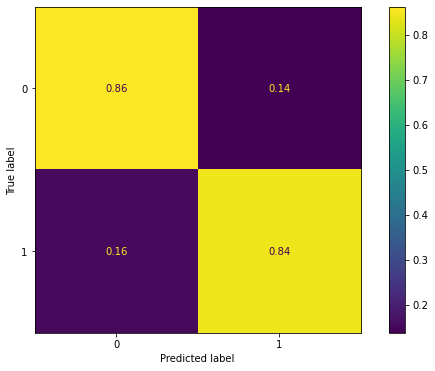

In [28]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

In [29]:
from sklearn.model_selection import cross_validate

In [30]:
model = LogisticRegression()
model

LogisticRegression()

In [32]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.040982,0.019984,0.800000,0.764706,0.928571,0.838710
2,0.030988,0.013996,0.800000,0.800000,0.857143,0.827586
3,0.024980,0.014025,0.875000,0.866667,0.928571,0.896552
4,0.032954,0.025979,0.833333,0.800000,0.923077,0.857143
5,0.047973,0.028986,0.791667,0.785714,0.846154,0.814815
6,0.028371,0.016194,0.708333,0.666667,0.923077,0.774194
7,0.021954,0.016998,0.791667,0.750000,0.923077,0.827586
8,0.030638,0.018195,0.875000,0.857143,0.923077,0.888889
9,0.040313,0.011651,0.708333,0.800000,0.615385,0.695652
10,0.030342,0.010992,0.875000,0.857143,0.923077,0.888889


In [33]:
df_scores.mean()[2:]

test_accuracy     0.805833
test_precision    0.794804
test_recall       0.879121
test_f1           0.831001
dtype: float64

In [34]:
log_model_GridSearch = LogisticRegression(solver='saga', max_iter=5000)

In [35]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [36]:
grid_model = GridSearchCV(log_model_GridSearch, param_grid = param_grid)

In [39]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [40]:
grid_model.best_params_

{'C': 11.28837891684689,
 'l1_ratio': 0.42105263157894735,
 'penalty': 'elasticnet'}

In [41]:
y_test_pred = grid_model.predict(X_test_scaled)
y_test_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

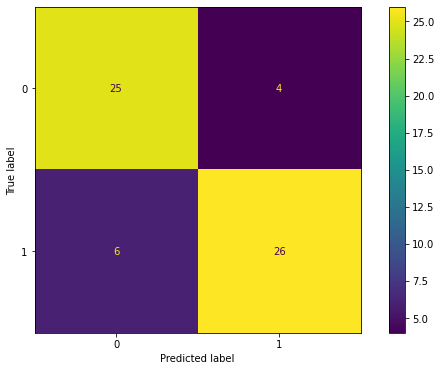

In [42]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [43]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[25  4]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [44]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

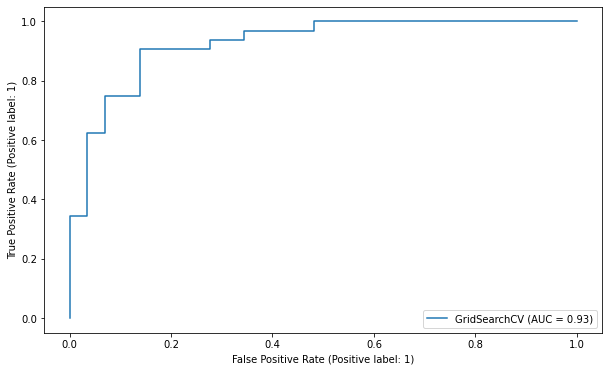

In [45]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

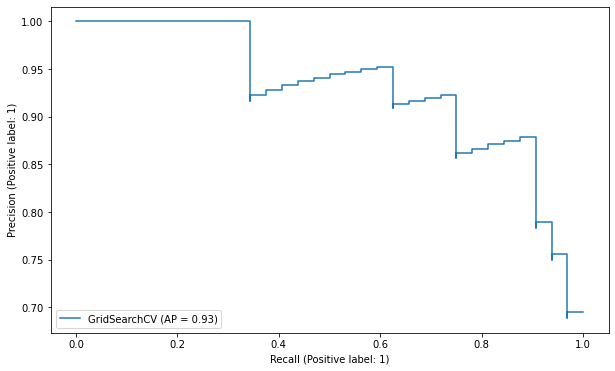

In [46]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

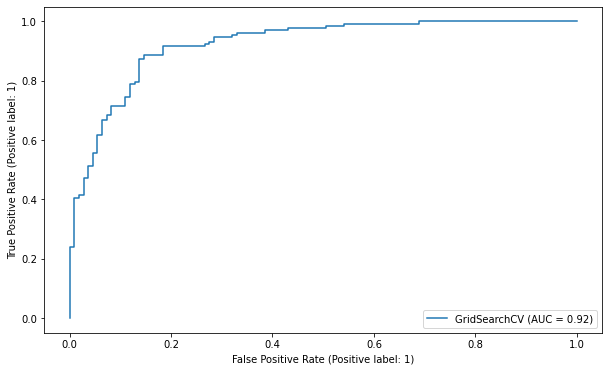

In [47]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

In [48]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9228116161964545

In [49]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [50]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5746116743492774

In [51]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [52]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred2
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,0,0.124783,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,1,0.684806,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,1,0.773664,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,0,0.101447,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,1,0.916141,1


In [53]:
y_test_pred2 = test_data["pred2"]

In [54]:
print(confusion_matrix(y_test,y_test_pred2))
print(classification_report(y_test,y_test_pred2))

[[26  3]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [55]:
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[25  4]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



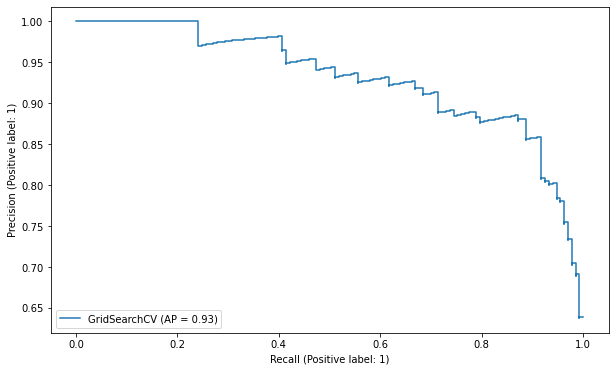

In [56]:
plot_precision_recall_curve(grid_model, X_train_scaled, y_train);

In [57]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9313480464229541

In [58]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [59]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  # harmonic mean
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5109239448229864

# Implement KNN and Evaluate

In [60]:
X = df.drop("target", axis=1)
y = df["target"]

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
scaler = MinMaxScaler()

In [64]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [67]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [68]:
y_test_pred = knn_model.predict(scaled_X_test)
y_test_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
y_test_pred_proba = knn_model.predict_proba(scaled_X_test)
y_test_pred_proba

array([[1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. ,

In [70]:
pd.DataFrame(y_test_pred_proba)

,0,1
0,1.0,0.0
1,0.4,0.6
2,0.0,1.0
3,0.8,0.2
4,0.2,0.8
...,...,...
56,0.8,0.2
57,0.2,0.8
58,0.6,0.4
59,1.0,0.0


In [71]:
my_dict = {"Actual": y_test, "Pred":y_test_pred, "Proba_1":y_test_pred_proba[:,1], "Proba_0":y_test_pred_proba[:,0]}

In [72]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
73,1,0,0.2,0.8
137,1,1,1.0,0.0
57,1,1,0.6,0.4
283,0,1,0.8,0.2
139,1,0,0.0,1.0
104,1,1,0.8,0.2
279,0,0,0.0,1.0
251,0,0,0.0,1.0
146,1,1,1.0,0.0
45,1,1,1.0,0.0


In [73]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [74]:
confusion_matrix(y_test, y_test_pred)

array([[25,  4],
       [ 6, 26]], dtype=int64)

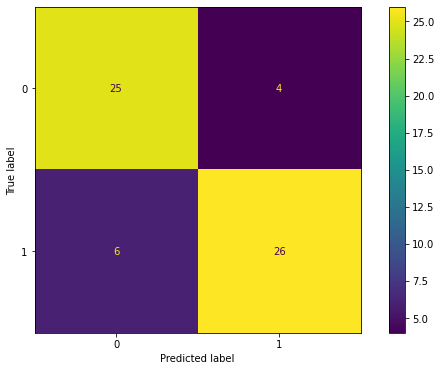

In [75]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test);

In [76]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[25  4]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [79]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [81]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_test_pred = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_test_pred)
    test_error_rates.append(test_error)
    print("k=", k, " error_rate:", test_error)

k= 1  error_rate: 0.19672131147540983
k= 2  error_rate: 0.24590163934426235
k= 3  error_rate: 0.14754098360655743
k= 4  error_rate: 0.21311475409836067
k= 5  error_rate: 0.16393442622950816
k= 6  error_rate: 0.180327868852459
k= 7  error_rate: 0.180327868852459
k= 8  error_rate: 0.19672131147540983
k= 9  error_rate: 0.180327868852459
k= 10  error_rate: 0.180327868852459
k= 11  error_rate: 0.16393442622950816
k= 12  error_rate: 0.16393442622950816
k= 13  error_rate: 0.180327868852459
k= 14  error_rate: 0.16393442622950816
k= 15  error_rate: 0.16393442622950816
k= 16  error_rate: 0.19672131147540983
k= 17  error_rate: 0.16393442622950816
k= 18  error_rate: 0.16393442622950816
k= 19  error_rate: 0.180327868852459
k= 20  error_rate: 0.14754098360655743
k= 21  error_rate: 0.180327868852459
k= 22  error_rate: 0.14754098360655743
k= 23  error_rate: 0.16393442622950816
k= 24  error_rate: 0.16393442622950816
k= 25  error_rate: 0.19672131147540983
k= 26  error_rate: 0.180327868852459
k= 27  erro

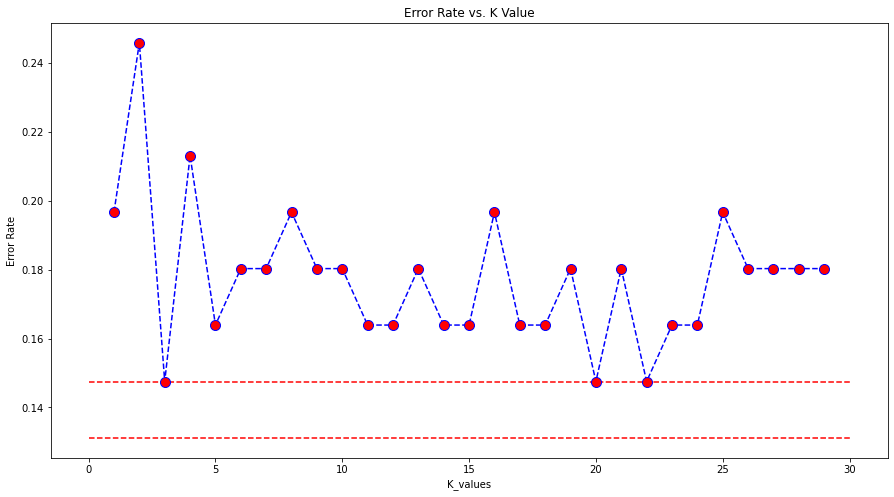

In [82]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.1311, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.1475, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=3


[[27  2]
 [ 7 25]]


              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



# Visually compare models based on your chosen metric

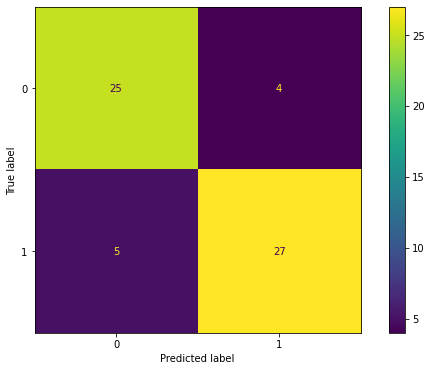

In [85]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

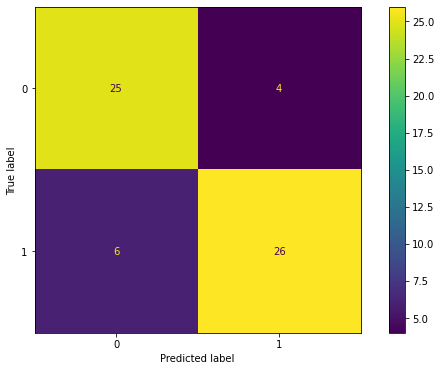

In [86]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

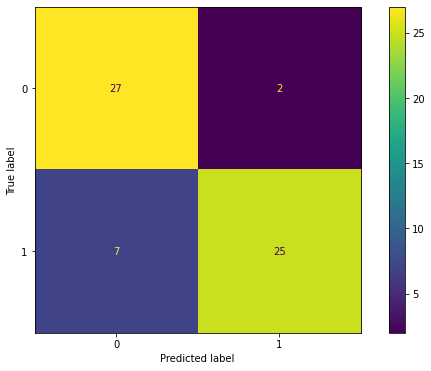

In [87]:
plot_confusion_matrix(knn, X_test_scaled, y_test);

# Chose best model and make a random prediction 